# 9.3.3 Prophet

### Explanation of Prophet

Prophet is an open-source forecasting tool developed by Facebook, designed to handle time series data that exhibits patterns such as trends and seasonality. It is particularly suited for business forecasting with daily observations and can incorporate holidays and special events. The Prophet model operates on the principle of decomposing the time series data into three main components:

1. **Trend**: Captures the long-term progression of the data, allowing for changes in the growth rate over time.
2. **Seasonality**: Models periodic fluctuations that occur at regular intervals, such as daily, weekly, or yearly cycles.
3. **Holiday Effects**: Includes the impact of holidays and special events on the time series, which can be added as additional regressors.

Prophet is robust to missing data and outliers, and it automatically handles the uncertainty in the forecasts by providing confidence intervals.

### Benefits and Use Cases of Prophet

**Benefits:**
- **Ease of Use**: Prophet is designed to be user-friendly with minimal need for extensive tuning and configuration.
- **Handling Seasonality**: It effectively models complex seasonal effects with a high degree of flexibility.
- **Incorporation of External Regressors**: Allows the inclusion of additional features like holidays and special events that can influence the forecast.
- **Robustness**: Handles missing data and outliers effectively, making it suitable for real-world applications where data imperfections are common.
- **Automatic Uncertainty Estimation**: Provides uncertainty intervals for forecasts, offering insights into the potential variability of future predictions.

**Use Cases:**
- **Retail and Sales Forecasting**: Predicts product demand, sales trends, and inventory needs, helping businesses plan and optimize their operations.
- **Finance and Economics**: Used for forecasting stock prices, economic indicators, and financial metrics.
- **Healthcare**: Predicts patient admissions, disease outbreaks, and other health-related metrics.
- **Energy and Utilities**: Forecasts energy consumption, electricity demand, and other utilities-related metrics.
- **Marketing and Advertising**: Helps in planning marketing campaigns and understanding the impact of promotions and special events.

### Methods for Implementing Prophet

**Steps:**
1. **Data Preparation**: Format the time series data with columns for dates and values. Ensure that the date column is in the correct format and that missing values are appropriately handled.
2. **Model Initialization**: Create a Prophet model object and configure it with desired parameters such as yearly seasonality and additional regressors.
3. **Fit the Model**: Fit the Prophet model to the historical data.
4. **Make Forecasts**: Generate future predictions using the fitted model and specify the number of periods to forecast.
5. **Visualize Results**: Plot the historical data along with the forecast to visualize the model's performance and future predictions.


___
___
### Readings:
- [Time series forecasting with Facebook Prophet](https://rahulaga.medium.com/time-series-forecasting-with-facebook-prophet-f0468ff6fa3b)
- [Getting Started Predicting Time Series Data with Facebook Prophet](https://towardsdatascience.com/getting-started-predicting-time-series-data-with-facebook-prophet-c74ad3040525)
- [Facebook Prophet](https://medium.com/swlh/facebook-prophet-426421f7e331)
- [Understanding FB Prophet: A Time Series Forecasting Algorithm](https://readmedium.com/en/https:/medium.com/illumination/understanding-fb-prophet-a-time-series-forecasting-algorithm-c998bc52ca10)
___
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.datasets import get_rdataset

In [2]:
# Load the Air Passengers dataset
data = get_rdataset('AirPassengers', 'datasets')
df = data.data

In [3]:
# Create a DateTime index
start_date = '1949-01-01'
df['Date'] = pd.date_range(start=start_date, periods=len(df), freq='M')
df.set_index('Date', inplace=True)

In [4]:
# Prepare the data for Prophet
df_reset = df.reset_index()  # Reset the index to get 'Date' as a column
df_reset.rename(columns={'Date': 'ds', 'value': 'y'}, inplace=True)

In [5]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_reset)

01:16:46 - cmdstanpy - INFO - Chain [1] start processing
01:16:46 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Create a dataframe for future dates
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast future values
forecast = model.predict(future)

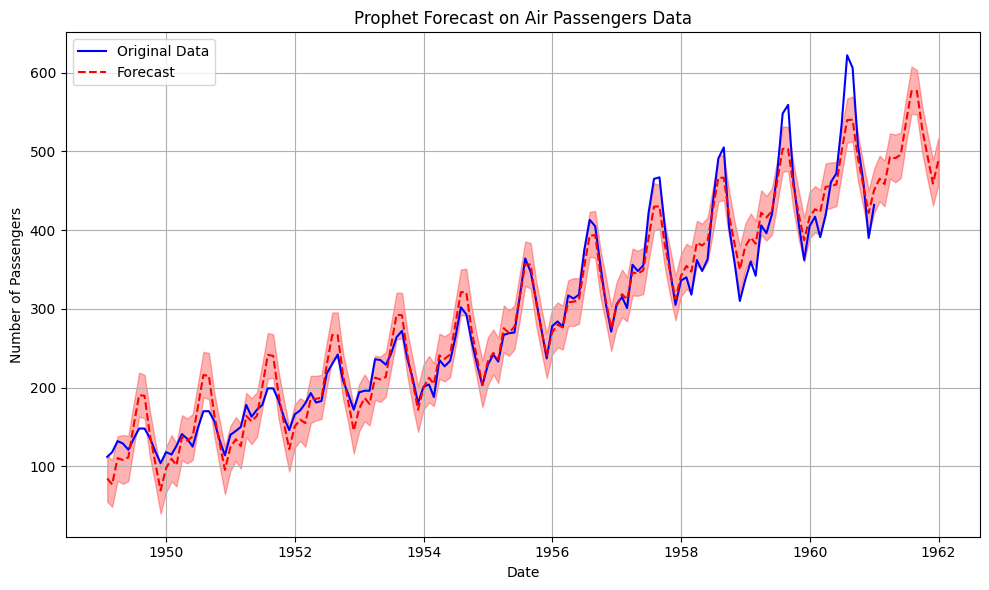

In [7]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(df_reset['ds'], df_reset['y'], color='blue', label='Original Data')

# Plot forecast
plt.plot(forecast['ds'], forecast['yhat'], color='red', linestyle='--', label='Forecast')

# Plot forecast confidence intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.3)

plt.title('Prophet Forecast on Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

In this analysis, we applied the Prophet model to the Air Passengers dataset to forecast future passenger numbers. The Prophet model, developed by Facebook, is particularly effective for time series data with strong seasonal effects and missing values.

**Key Takeaways:**

1. **Data Preparation**: The dataset was transformed to meet Prophet’s requirements, with columns renamed to `ds` (date) and `y` (value). This step is crucial for ensuring compatibility with the Prophet model.

2. **Forecast Visualization**: The forecasted values, along with confidence intervals, were plotted alongside the original data. The red dashed line represents the forecasted values, while the shaded area denotes the confidence intervals, showcasing the model’s predictive power and uncertainty.

3. **Model Performance**: Prophet effectively captured the trends and seasonality in the Air Passengers data, providing valuable insights for future passenger forecasts.

Overall, Prophet is a robust tool for forecasting time series data, especially when dealing with complex seasonal patterns and trends. Its intuitive design and flexibility make it a valuable asset for time series forecasting tasks.
